In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Creating a dataset with Curvilinear Relationship
x = 10 * np.random.normal(loc=0, scale=1, size=70)
y = 10 * ( -x ** 2) + np.random.normal(-100, 100, 70)

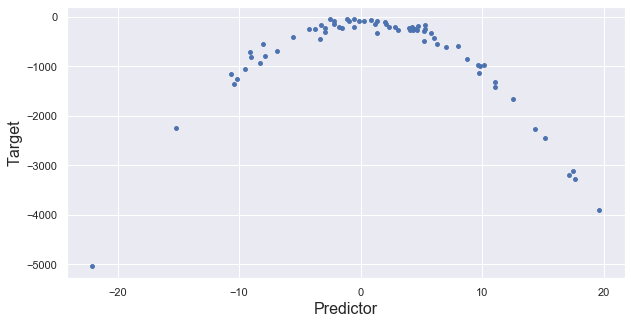

In [5]:
# plotting the dataset
plt.figure(figsize =(10, 5))
plt.scatter(x, y, s=15 )
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [6]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [8]:
# Training the Model
lm = LinearRegression()
lm.fit(x.reshape(-1,1), y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Let see how the linear regression performs on the non-linear data
y_pred = lm.predict(x.reshape(-1,1))

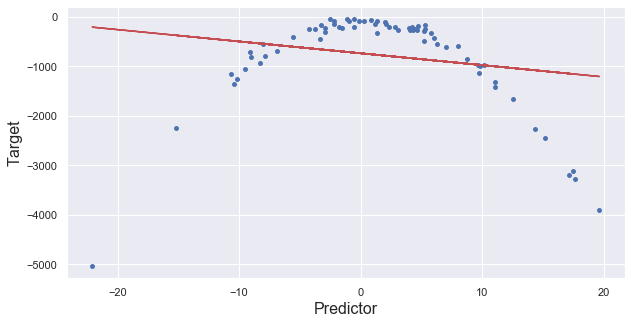

In [13]:
# Plotting the predicted value with the actual value
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s=15)
plt.plot(x, y_pred, color='r')
plt.xlabel("Predictor", fontsize=16)
plt.ylabel("Target", fontsize=16)
plt.show()

In [14]:
# importing library for calculating mean_squared error
from sklearn.metrics import mean_squared_error

In [16]:
mean_squared_error_mse = mean_squared_error(y, y_pred)
root_mean_square_error_rmse = np.sqrt(mean_squared_error_mse)

In [17]:
print('MSE for Linear Regression => ', mean_squared_error_mse)
print('RMSE for Linear Regression => ', root_mean_square_error_rmse)

MSE for Linear Regression =>  946861.0740490822
RMSE for Linear Regression =>  973.0678671341904


In [18]:
# The RMSE and MSE values are too high.

# Polynomial Regression

In [20]:
# pipeline for the polynomial transforma
from sklearn.preprocessing import PolynomialFeatures

In [21]:
# For creating pipeline
from sklearn.pipeline import Pipeline

# creating pipeline and fitting the it on the data
# here I have taken a 2-degree polynomial
pipeline_steps = [('polynomial', PolynomialFeatures(degree=2)), ('modal', LinearRegression())]

pipe = Pipeline(pipeline_steps)
pipe.fit(x.reshape(-1,1), y.reshape(-1,1))

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [22]:
# Lets predict the output
poly_predict = pipe.predict(x.reshape(-1,1))

In [23]:
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x, poly_predict))
x_poly, poly_pred = zip(*sorted_zip)

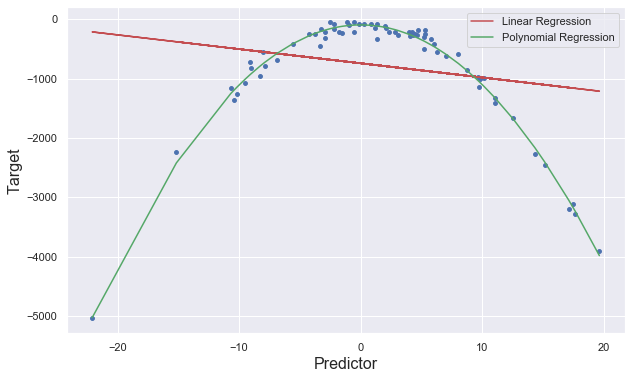

In [24]:
#plotting predictions

plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred, color='r', label='Linear Regression') 
plt.plot(x_poly, poly_pred, color='g', label='Polynomial Regression')
plt.xlabel('Predictor', fontsize=16)
plt.ylabel('Target', fontsize=16)
plt.legend()
plt.show()

In [25]:
mean_squared_error_mse_poly_pred = mean_squared_error(y, poly_pred)
root_mean_square_error_rmse_poly_pred = np.sqrt(mean_squared_error_mse)

In [26]:
print('MSE for Polynomial Regression => ', mean_squared_error_mse_poly_pred)
print('RMSE for Polynomial Regression => ', root_mean_square_error_rmse_poly_pred)

MSE for Polynomial Regression =>  2006922.5939971379
RMSE for Polynomial Regression =>  973.0678671341904


  <b> The polynomial model produces better result then linear regression.</b>
  <b>The  RMSE value is also low as compared to Linear Regression. </b>